load all the required libraries

In [1]:
# from proteinbert import load_pretrained_model
# from proteinbert.conv_and_global_attention_model import get_model_with_hidden_layers_as_outputs
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

2023-11-30 10:45:22.784867: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9498] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 10:45:22.784922: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 10:45:22.786807: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 10:45:22.894381: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 10:45:23.886891: W tensorflow/compiler/

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


load the dataset

In [3]:
df = pd.read_csv('/home/gdt-ws4/Desktop/prediction_all/mutated.csv')

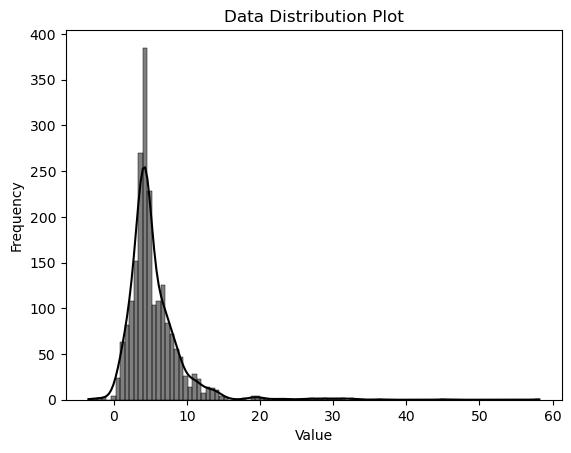

<Figure size 640x480 with 0 Axes>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['delta_G'], bins=100, kde=True,color='black')  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Data Distribution Plot')

# Display the plot
plt.show()
plt.savefig('data_dis.png')

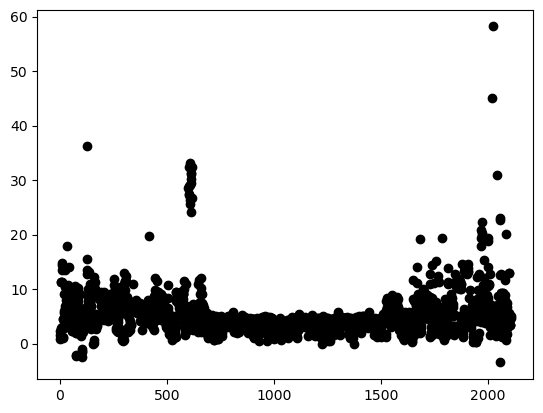

In [15]:
plt.scatter(df['Unnamed: 0'],df['delta_G'],color = 'black')

In [6]:
df = df.drop(2063).reset_index(drop=True)

In [7]:
df.tail(50)

,Unnamed: 0,UniProt ID,Mutants,Protein Sequence,delta_G,mutated_sequence
2048,2057,Q75QQ5,I189L,MNSYQNKNEYEILNAPSNNTNMPNRYPFANDPNAMMKNGNYKDWLD...,22.78,MNSYQNKNEYEILNAPSNNTNMPNRYPFANDPNAMMKNGNYKDWLD...
2049,2058,Q75QQ5,L175V,MNSYQNKNEYEILNAPSNNTNMPNRYPFANDPNAMMKNGNYKDWLD...,12.61,MNSYQNKNEYEILNAPSNNTNMPNRYPFANDPNAMMKNGNYKDWLD...
2050,2059,Q7LZZ4,wild-type,EEPLPDRAVPIYVAGFLALPRGPFFVGLIAVQLLRDRSLVAERRRQ...,12.70,EEPLPDRAVPIYVAGFLALPRGPFFVGLIAVQLLRDRSLVAERRRQ...
2051,2060,Q7LZZ4,C350S,EEPLPDRAVPIYVAGFLALPRGPFFVGLIAVQLLRDRSLVAERRRQ...,9.30,EEPLPDRAVPIYVAGFLALPRGPFFVGLIAVQLLRDRSLVAERRRQ...
2052,2061,Q7LZZ4,G288A,EEPLPDRAVPIYVAGFLALPRGPFFVGLIAVQLLRDRSLVAERRRQ...,9.30,EEPLPDRAVPIYVAGFLALPRGPFFVGLIAVQLLRDRSLVAERRRQ...
2053,2062,Q7LZZ4,E291D,EEPLPDRAVPIYVAGFLALPRGPFFVGLIAVQLLRDRSLVAERRRQ...,7.20,EEPLPDRAVPIYVAGFLALPRGPFFVGLIAVQLLRDRSLVAERRRQ...
2054,2063,Q7LZZ4,R299A,EEPLPDRAVPIYVAGFLALPRGPFFVGLIAVQLLRDRSLVAERRRQ...,9.00,EEPLPDRAVPIYVAGFLALPRGPFFVGLIAVQLLRDRSLVAERRRQ...
2055,2064,Q7M089,wild-type,MANLSYWLLALFVAMWTDVGLCKKRPKPGGWNTGGSRYPGQGSPGG...,6.10,MANLSYWLLALFVAMWTDVGLCKKRPKPGGWNTGGSRYPGQGSPGG...
2056,2065,Q7SID9,H69A,STGPVAPLPTPPNFPNDIALFQQAYQNWSKEIMLDATWVCSPKTPQ...,1.20,STGPVAPLPTPPNFPNDIALFQQAYQNWSKEIMLDATWVCSPKTPQ...
2057,2066,Q7SIF8,wild-type,QKPKLLYCSNGGYFLRIFPDGKVDGTRDRSDPYIQLQFYAESVGEV...,6.10,QKPKLLYCSNGGYFLRIFPDGKVDGTRDRSDPYIQLQFYAESVGEV...


Encode the protein sequence

In [8]:
# Assuming 'df' is your DataFrame
protein_sequences = df['mutated_sequence']
delta_g_values = df['delta_G']

# Define the amino acids and their order
amino_acids = "ACDEFGHIKLMNPQRSTVWY"

def one_hot_encode_sequence(sequence):
    # Create a dictionary to map each amino acid to an index
    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    
    # Initialize an array of zeros with the shape (sequence_length, number_of_amino_acids)
    sequence_length = len(sequence)
    one_hot_encoded = np.zeros((sequence_length, len(amino_acids)), dtype=int)
    
    # Set the appropriate index to 1 for each amino acid in the sequence
    for i, aa in enumerate(sequence):
        one_hot_encoded[i, aa_to_index[aa]] = 1
    
    return one_hot_encoded

# One-hot encode all the protein sequences in the DataFrame
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have a list of one-hot encoded sequences
encoded_sequences = [one_hot_encode_sequence(seq) for seq in protein_sequences]

#Find the maximum sequence length
max_sequence_length = max(len(seq) for seq in encoded_sequences)

# Pad sequences to the maximum length
padded_sequences = pad_sequences(encoded_sequences, maxlen=max_sequence_length, padding='post', truncating='post', dtype='float32')

# Convert the padded_sequences list to a numpy array
X = np.array(padded_sequences)

# Convert the delta_g_values to a numpy array
y = np.array(delta_g_values)
del protein_sequences
del delta_g_values
del encoded_sequences
del padded_sequences


split the X,y value in train,test,validation

In [9]:
# Split the data into 70% training and 30% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,random_state=42)

# # Split the remaining data (30%) into 10% validation and 20% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# # Print the shapes of the datasets
print("Training data shapes:", X_train.shape, y_train.shape)
print("Validation data shapes:", X_val.shape, y_val.shape)
print("Test data shapes:", X_test.shape, y_test.shape)


Training data shapes: (1468, 34350, 20) (1468,)
Validation data shapes: (207, 34350, 20) (207,)
Test data shapes: (423, 34350, 20) (423,)


model creation and building

In [10]:
# Set the input shape and number of classes (1 for regression)
input_shape = (X_train.shape[1:])
num_classes = 1

# Create the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='linear'))  # Using 'linear' activation for regression

# Compile the model with appropriate loss function and optimizer
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Apply learning rate scheduling
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)

# Train the model using the training dataset and validate on the validation set
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[lr_scheduler])


2023-11-30 10:47:08.050557: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 10:47:08.164794: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 10:47:08.165414: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/100


2023-11-30 10:47:23.091251: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-30 10:47:26.666467: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f180801e170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-30 10:47:26.666498: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-11-30 10:47:26.678924: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-30 10:47:26.791117: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 [==============================] - ETA: 0s - loss: 29.1828

2023-11-30 10:47:37.885386: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 568836000 exceeds 10% of free system memory.
2023-11-30 10:47:38.529691: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 568836000 exceeds 10% of free system memory.


46/46 [==============================] - 20s 240ms/step - loss: 29.1828 - val_loss: 13.1289 - lr: 0.0010
Epoch 2/100
46/46 [==============================] - 6s 134ms/step - loss: 15.5150 - val_loss: 12.3295 - lr: 0.0010
Epoch 3/100
46/46 [==============================] - 6s 132ms/step - loss: 13.8050 - val_loss: 11.3303 - lr: 0.0010
Epoch 4/100
46/46 [==============================] - 6s 133ms/step - loss: 12.3923 - val_loss: 11.8706 - lr: 0.0010
Epoch 5/100
46/46 [==============================] - 6s 134ms/step - loss: 10.8438 - val_loss: 8.5228 - lr: 0.0010
Epoch 6/100
46/46 [==============================] - 6s 134ms/step - loss: 9.0456 - val_loss: 7.9307 - lr: 0.0010
Epoch 7/100
46/46 [==============================] - 6s 134ms/step - loss: 8.6557 - val_loss: 7.6753 - lr: 0.0010
Epoch 8/100
46/46 [==============================] - 6s 140ms/step - loss: 7.8927 - val_loss: 7.7534 - lr: 0.0010
Epoch 9/100
46/46 [==============================] - 6s 133ms/step - loss: 7.0198 - val_lo

checking the mean_squared_error, r2_score

In [11]:
# Assuming you have predictions and true values as numpy arrays
prediction = model.predict(X_test)
y_true = np.array(y_test)  # True delta_G values for the test data
y_pred = prediction.reshape(-1)  # Reshape predictions to a 1D array if needed

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate coefficient of determination (R-squared score)
r2_score_value = r2_score(y_true, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2_score_value)


2023-11-30 10:57:55.777321: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1162404000 exceeds 10% of free system memory.


14/14 [==============================] - 1s 64ms/step
Mean Squared Error (MSE): 3.1802261665262175
R-squared Score: 0.791730672230668


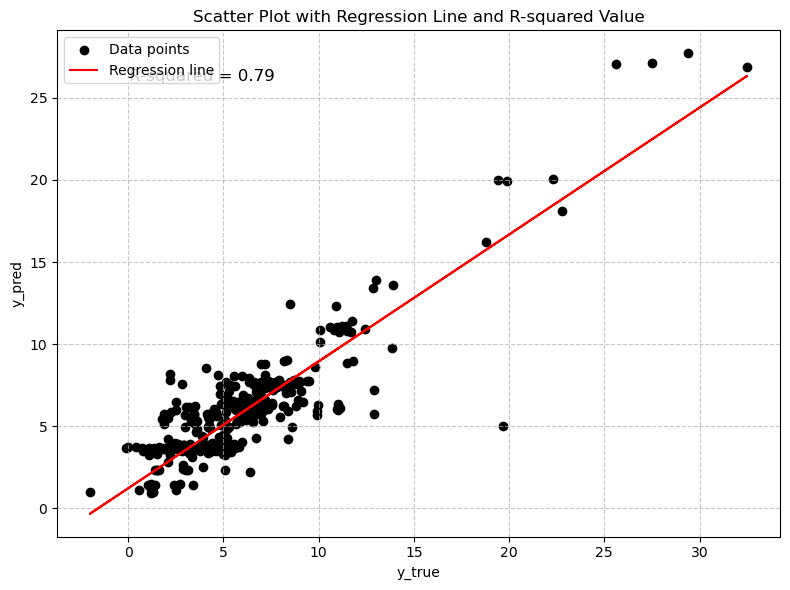

In [13]:
import matplotlib.pyplot as plt
regression_line = np.polyfit(y_true, y_pred, 1)
regression_fn = np.poly1d(regression_line)

# Calculate the R-squared value
r2 = r2_score(y_true, y_pred)

# Create a scatter plot with regression line and R-squared value
plt.figure(figsize=(8, 6))

plt.scatter(y_true, y_pred, color='black', label='Data points')
plt.plot(y_true, regression_fn(y_true), color='red', label='Regression line')

# Annotate with R-squared value
plt.annotate(f'R-squared = {r2:.2f}', (0.1, 0.9), xycoords='axes fraction', fontsize=12)

plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Scatter Plot with Regression Line and R-squared Value')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



save the model

In [12]:
model.save('change_data.h5')

/home/gdt-ws4/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


for predicting Delta_G  of single sequence

In [12]:
import numpy as np
from keras.models import load_model

# Protein sequence for prediction
protein_sequence = 'MLSRAVCGTSRQLAPVLGYLGSRQKHSLPDLPYDYGALEPHINAQIMQLHHSKHHAAYVNNLNVTEEKYQEALAKGDVTAQIALQPALKFNGGGHINHSIFWTNLSPNGGGEPKGELLEAIKRDFGSFDKFKEKLTAASVGVQGSGWGWLGFNKERGHLQIAACPNQDPLQGTTGLIPLLGIDVWEHAYYLQYKNVRPDYLKAIWNVINWENVTERYMACKK'


# Load the model

# Define the amino acids and their order

amino_acids = "ACDEFGHIKLMNPQRSTVWY"

def one_hot_encode_sequence(sequence):
    # Create a dictionary to map each amino acid to an index
    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    
    # Initialize an array of zeros with the shape (sequence_length, number_of_amino_acids)
    sequence_length = len(sequence)
    one_hot_encoded = np.zeros((sequence_length, len(amino_acids)), dtype=int)
    
    # Set the appropriate index to 1 for each amino acid in the sequence
    for i, aa in enumerate(sequence):
        one_hot_encoded[i, aa_to_index[aa]] = 1
    
    return one_hot_encoded

# One-hot encode the protein sequence
encoded_sequence = one_hot_encode_sequence(protein_sequence)

# Pad the sequence to the desired length (34350)
desired_sequence_length = max_sequence_length
padded_encoded_sequence = np.pad(encoded_sequence, ((0, desired_sequence_length - len(encoded_sequence)), (0, 0)), 'constant')

# Reshape to a 3D array with shape (1, 34350, 20)
encoded_sequence_3D = padded_encoded_sequence[np.newaxis, :, :]

# Make predictions using the model
predicted_delta_g = model.predict(encoded_sequence_3D)

print("Predicted Delta_G value:", predicted_delta_g[0][0])


1/1 [==============================] - 0s 16ms/step
Predicted Delta_G value: 5.304878


In [ ]:
Predicted Delta_G value: 6.130406
Predicted Delta_G value: 4.6328096

In [ ]:
Predicted Delta_G value: 5.3616695
Predicted Delta_G value: 7.078027

predicting all sequence in dataframe 

In [ ]:
# Assuming df is the DataFrame containing all the columns as described
X_test = df['Mutated Sequence']

# Define the maximum sequence length
max_sequence_length = 34350

# Assuming one_hot_encode_sequence function is defined as before

# Pad or truncate the sequences to the maximum length
encoded_sequences = [one_hot_encode_sequence(seq) for seq in X_test]
padded_sequences = pad_sequences(encoded_sequences, maxlen=max_sequence_length, padding='post', dtype='float32')

# Load the trained model from the file
model = load_model('change_data.h5')

# Make predictions using the loaded model
predicted_delta_g = model.predict(padded_sequences)

# Create a new DataFrame with all the columns and Predicted Delta_G values
df_predicted = pd.DataFrame({
    'Main': df['Main'],
    'Swiss-Prot': df['Swiss-Prot'],
    'AA': df['AA'],
    'Variant': df['Variant'],
    'FTId': df['FTId'],
    'dbSNP': df['dbSNP'],
    'Disease name': df['Disease name'],
    'new_variant': df['new_variant'],
    'sequences_data': df['sequences_data'],
    'Mutated Sequence': X_test,
    'Delta_G': predicted_delta_g.flatten()
})

# Display the DataFrame
print(df_predicted)
